In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [3]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [4]:
brazil_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) &\
                                (indicator_data['CountryCode'] == 'BR')]

In [5]:
brazil_df_ind3.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [7]:
ts = brazil_df_ind3['Value'] 
ts1 = brazil_df_ind3[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,44.404598
2015-01-01,44.659855
2014-01-01,45.142889
2013-01-01,45.578531
2012-01-01,45.997899


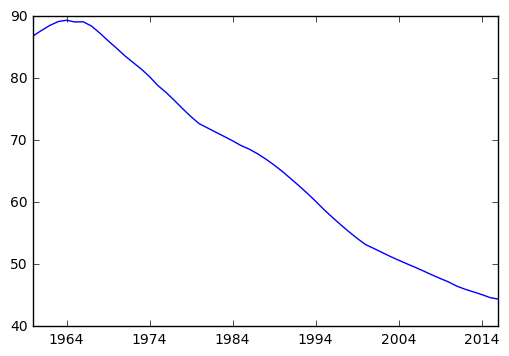

In [8]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


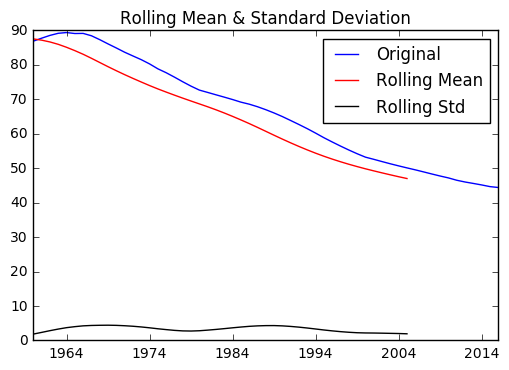

Results of Dickey-Fuller Test:
Test Statistic                 -2.894687
p-value                         0.045969
#Lags Used                      1.000000
Number of Observations Used    55.000000
Critical Value (10%)           -2.595670
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

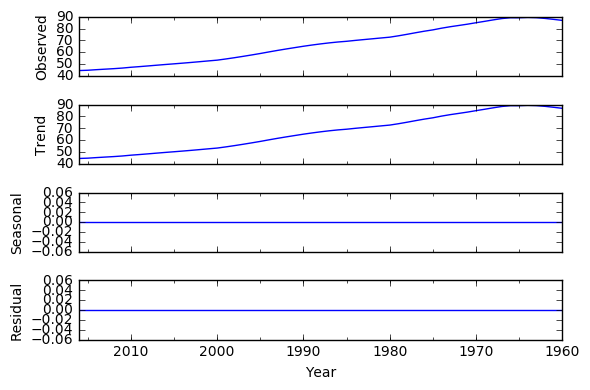

In [10]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [11]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

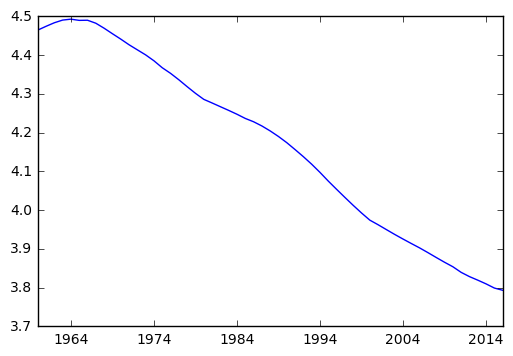

In [12]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


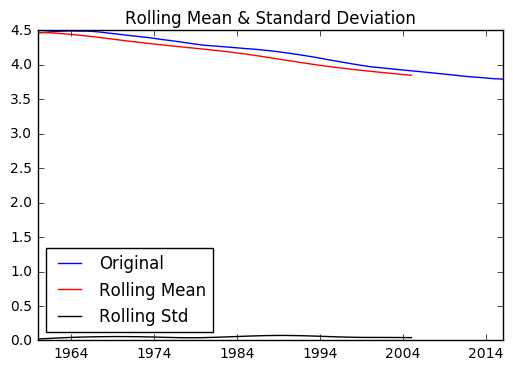

Results of Dickey-Fuller Test:
Test Statistic                 -2.764675
p-value                         0.063500
#Lags Used                      1.000000
Number of Observations Used    55.000000
Critical Value (10%)           -2.595670
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
dtype: float64


In [13]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [14]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


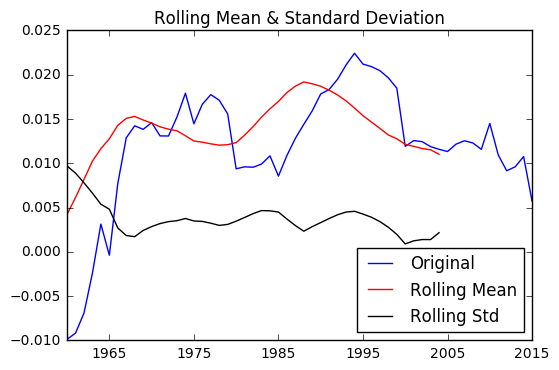

Results of Dickey-Fuller Test:
Test Statistic                  0.342711
p-value                         0.979221
#Lags Used                      0.000000
Number of Observations Used    55.000000
Critical Value (10%)           -2.595670
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
dtype: float64


In [15]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [16]:
def firstDifference(df):
    #ts_first_diff = df - df.shift()
    #ts_first_diff.dropna(inplace=True)
    ts_first_diff = df.diff()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff



C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


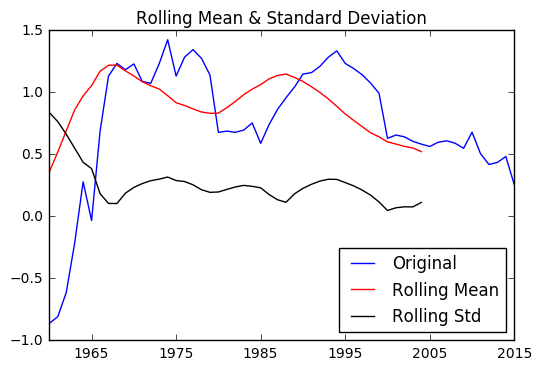

Results of Dickey-Fuller Test:
Test Statistic                  0.261053
p-value                         0.975485
#Lags Used                      0.000000
Number of Observations Used    55.000000
Critical Value (10%)           -2.595670
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
dtype: float64


In [17]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [18]:
def expWeightedavg(ts1_log):
    expwighted_avg = pd.ewma(ts1_log, halflife=57)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,halflife=57,adjust=True).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


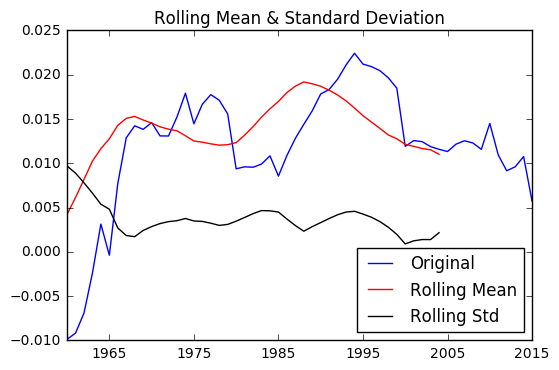

Results of Dickey-Fuller Test:
Test Statistic                  0.342711
p-value                         0.979221
#Lags Used                      0.000000
Number of Observations Used    55.000000
Critical Value (10%)           -2.595670
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
dtype: float64


In [19]:
ts_log_ewma_diff = expWeightedavg(ts1_log)
test_stationarity(ts_log_ewma_diff.Value)

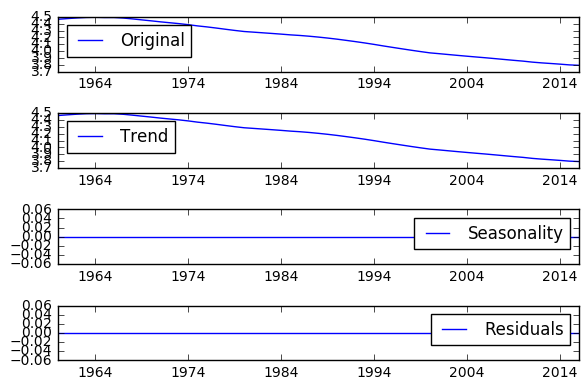

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [21]:
lag_acf = acf(ts1_log, nlags=10)
lag_pacf = pacf(ts1_log, nlags=10, method='ols')

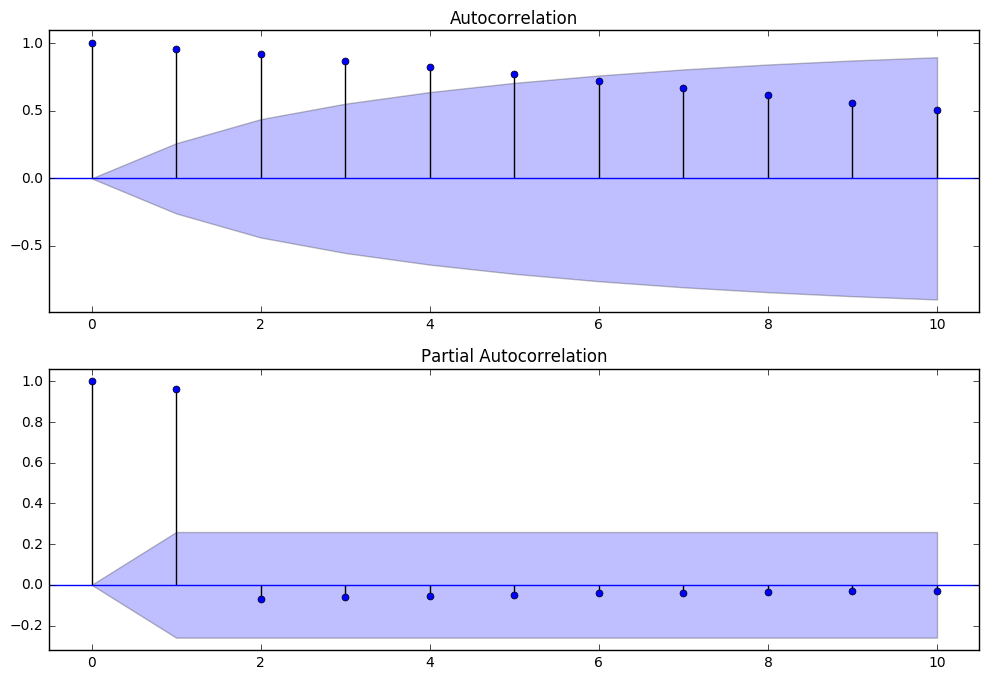

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

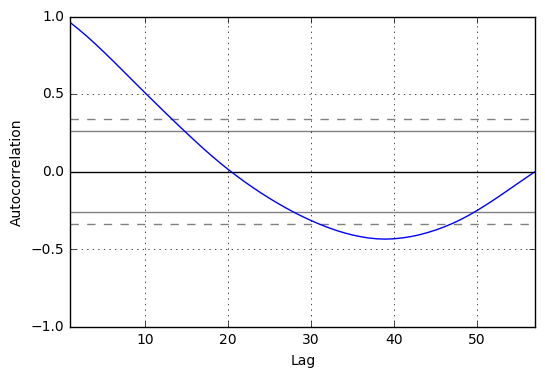

In [23]:
autocorrelation_plot(ts1_log)
plt.show()

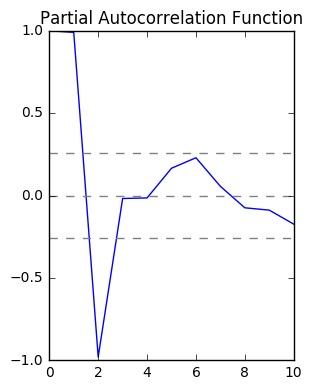

In [24]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [25]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [26]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [27]:
def AR_Model(ts):
    model = ARIMA(ts, order=(2, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


Lag: 2
Coefficients: const          4.102556
ar.L1.Value    1.984149
ar.L2.Value   -0.987989
dtype: float64
2006-01-01    49.584131
Freq: -1AS-JAN, dtype: float64
-505.2274839805127


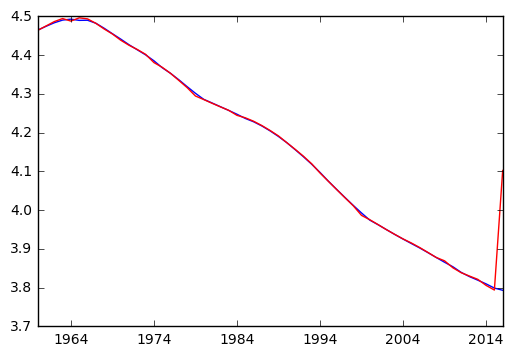

In [28]:
model_AR = AR_Model(ts1_log)

In [35]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 13))
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 4))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Lag: 0
Coefficients: const            4.170250
ma.L1.Value      3.071343
ma.L2.Value      6.044400
ma.L3.Value      9.456888
ma.L4.Value     12.761724
ma.L5.Value     15.351530
ma.L6.Value     16.401985
ma.L7.Value     16.042596
ma.L8.Value     14.280948
ma.L9.Value     11.349142
ma.L10.Value     7.872045
ma.L11.Value     4.485068
ma.L12.Value     2.033341
ma.L13.Value     0.477561
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                    ARMA(0, 13)   Log Likelihood                 223.324
Method:                       css-mle   S.D. of innovations              0.004
Date:                Wed, 16 Aug 2017   AIC                           -416.648
Time:                        01:40:55   BIC                           -386.003
Sample:                    01-01-2016   HQIC                          -404.738
                         - 01-01-1960          

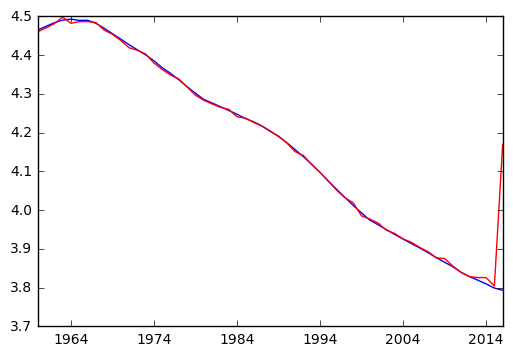

In [36]:
model_MA = MA_Model(ts1_log)

In [39]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(2, 0, 6))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2,0, 1))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Lag: 2
Coefficients: const          4.099343
ar.L1.Value    1.976015
ar.L2.Value   -0.979664
ma.L1.Value   -0.057283
ma.L2.Value    0.015124
ma.L3.Value    0.238026
ma.L4.Value    0.260646
ma.L5.Value   -0.015486
ma.L6.Value   -0.229867
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(2, 6)   Log Likelihood                 259.681
Method:                       css-mle   S.D. of innovations              0.002
Date:                Wed, 16 Aug 2017   AIC                           -499.363
Time:                        01:42:07   BIC                           -478.932
Sample:                    01-01-2016   HQIC                          -491.423
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------

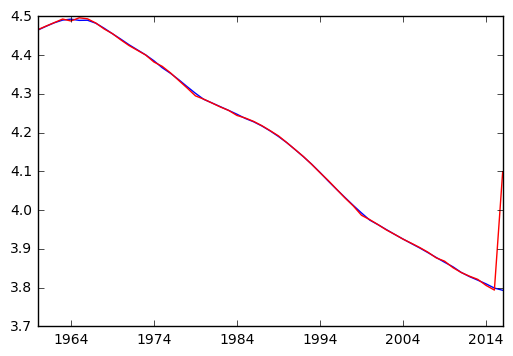

In [40]:
model_Combined = Combined_Model(ts1_log)

In [66]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(2,0, 1))


In [67]:
aic_metric

,AIC,Modelname
0,-199.409124,"ARIMA(ts, order=(2, 0, 0))"
0,-169.618611,"ARIMA(ts, order=(0, 0, 4))"
0,-202.477077,"ARIMA(ts, order=(2,0, 1))"


In [53]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    #output.tolist()
    output = np.exp(output)
    #out=normal(output)
    return output

In [57]:
forecast(model_AR,50)


array([ 85.92561316,  84.87013696,  83.73114856,  82.51779505,
        81.23938138,  79.90525999,  78.52472758,  77.10693064,
        75.66078065,  74.19487994,  72.71745849,  71.23632196,
        69.75881077,  68.29176982,  66.84152832,  65.41388903,
        64.01412593,  62.64698954,  61.31671871,  60.02705806,
        58.78127997,  57.58221019,  56.43225615,  55.33343718,
        54.28741584,  53.29552976,  52.35882328,  51.47807851,
        50.65384536,  49.88647011,  49.17612244,  48.52282048,
        47.9264539 ,  47.38680493,  46.90356714,  46.47636206,
        46.10475365,  45.78826054,  45.52636625,  45.31852733,
        45.16417948,  45.06274187,  45.01361957,  45.01620428,
        45.06987346,  45.17398785,  45.32788758,  45.53088694,
        45.78226787,  46.08127233])

In [55]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    #PredictedVal=normal(fittedVal)
    #PredictedVal= fittedVal.tolist()
    fittedVal = np.exp(fittedVal)
    print('Predicted existing values are:')
    return fittedVal
FittedValues(model_AR)

Predicted existing values are:


Year
2016-01-01    60.494695
2015-01-01    44.431126
2014-01-01    44.965854
2013-01-01    45.676563
2012-01-01    46.063118
2011-01-01    46.464872
2010-01-01    47.057510
2009-01-01    47.910360
2008-01-01    48.326063
2007-01-01    48.956174
2006-01-01    49.584131
2005-01-01    50.168868
2004-01-01    50.696695
2003-01-01    51.297602
2002-01-01    51.923569
2001-01-01    52.600449
2000-01-01    53.269462
1999-01-01    53.870522
1998-01-01    55.229706
1997-01-01    56.385884
1996-01-01    57.593439
1995-01-01    58.832528
1994-01-01    60.104976
1993-01-01    61.537798
1992-01-01    62.763025
1991-01-01    63.892113
1990-01-01    64.994952
1989-01-01    66.126422
1988-01-01    67.058226
1987-01-01    67.923433
1986-01-01    68.688418
1985-01-01    69.303253
1984-01-01    69.736936
1983-01-01    70.653313
1982-01-01    71.288805
1981-01-01    71.945692
1980-01-01    72.640819
1979-01-01    73.305688
1978-01-01    74.908588
1977-01-01    76.314092
1976-01-01    77.724147
1975-01-01 